#LSTM Models for Univariate Time Series Forecasting of Stock Price

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) architecture that is particularly well-suited for time series forecasting tasks. LSTMs are designed to capture and remember patterns in sequences of data, making them effective for modeling temporal dependencies.

In [1]:
# Loading essential libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

In [2]:
# Preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
  x,y=[],[]
  for i in range(len(timeseries_data)):
    # find the end of this pattern
    end_ix= i+ n_features
    # Check if we are beyond the sequence
    if end_ix > len(timeseries_data)-1:
      break

    # Gather input and output parts of the pattern
    seq_x, seq_y= timeseries_data[i:end_ix], timeseries_data[end_ix]
    x.append(seq_x)
    y.append(seq_y)

  return np.array(x), np.array(y)

In [28]:
import pandas as pd
data=pd.read_csv("/content/TATAELXSI.NS.csv")
timeseries_data=pd.DataFrame(data)
timeseries_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-12,6742.000000,6745.000000,6680.0,6692.250000,6640.194336,106993
1,2022-12-13,6718.000000,6734.000000,6625.0,6632.600098,6581.008789,189805
2,2022-12-14,6659.950195,6744.399902,6611.0,6621.200195,6569.697266,195376
3,2022-12-15,6645.000000,6687.700195,6545.0,6550.350098,6499.398438,207197
4,2022-12-16,6535.100098,6544.799805,6401.0,6429.399902,6379.389160,244998


In [29]:
# Using only Open price of stock for trainning
timeseries_data=timeseries_data.iloc[:,1]
timeseries_data

0      6742.000000
1      6718.000000
2      6659.950195
3      6645.000000
4      6535.100098
          ...     
242    8402.049805
243    8431.049805
244    8469.000000
245    8370.049805
246    8401.700195
Name: Open, Length: 247, dtype: float64

In [40]:
# Choose a number of time steps
n_steps= 7
# split into samples
x,y=prepare_data(timeseries_data, n_steps)

In [41]:
print(x), print(y)

[[6742.       6718.       6659.950195 ... 6535.100098 6430.
  6354.      ]
 [6718.       6659.950195 6645.       ... 6430.       6354.
  6355.600098]
 [6659.950195 6645.       6535.100098 ... 6354.       6355.600098
  6240.      ]
 ...
 [8331.049805 8340.       8432.099609 ... 8499.       8402.049805
  8431.049805]
 [8340.       8432.099609 8333.25     ... 8402.049805 8431.049805
  8469.      ]
 [8432.099609 8333.25     8499.       ... 8431.049805 8469.
  8370.049805]]
[6355.600098 6240.       6015.       5840.       6349.700195 6365.049805
 6280.       6337.       6317.350098 6321.       6448.75     6384.950195
 6315.       6270.       6232.       6230.799805 6217.600098 6225.
 6251.       6277.       6270.       6283.       6301.       6412.
 6744.       6678.       6700.       6655.       6580.       6666.
 6619.850098 6621.200195 6575.       6700.       6726.       6700.
 6710.       6685.       6580.100098 6610.       6650.       6670.
 6666.049805 6699.       6610.       6510.   

(None, None)

In [42]:
x.shape, y.shape

((240, 7), (240,))

In [43]:
# Reshape from [sample, timesteps] into [sample, timesteps, features]
n_features=1
x=x.reshape((x.shape[0], x.shape[1], n_features))

Building LSTM model

In [46]:
# Define the model
model=Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

# fit model
model.fit(x,y, epochs=300, verbose=1)

Epoch 1/300
8/8 [==============================] - 3s 12ms/step - loss: 48143128.0000
Epoch 2/300
8/8 [==============================] - 0s 12ms/step - loss: 45181668.0000
Epoch 3/300
8/8 [==============================] - 0s 12ms/step - loss: 37212244.0000
Epoch 4/300
8/8 [==============================] - 0s 13ms/step - loss: 32104192.0000
Epoch 5/300
8/8 [==============================] - 0s 12ms/step - loss: 27274624.0000
Epoch 6/300
8/8 [==============================] - 0s 14ms/step - loss: 21932300.0000
Epoch 7/300
8/8 [==============================] - 0s 13ms/step - loss: 16472988.0000
Epoch 8/300
8/8 [==============================] - 0s 11ms/step - loss: 10182337.0000
Epoch 9/300
8/8 [==============================] - 0s 11ms/step - loss: 5185907.5000
Epoch 10/300
8/8 [==============================] - 0s 11ms/step - loss: 1861188.6250
Epoch 11/300
8/8 [==============================] - 0s 10ms/step - loss: 331183.3438
Epoch 12/300
8/8 [==============================] - 0s 1

In [50]:
# Predictiong for the next 10 days
x_input=np.array(timeseries_data[240:])
temp_input= list(x_input)
lst_output=[]
i=0
while(i<10):
  if (len(temp_input)>7):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))

    x_input=x_input.reshape((1,n_steps,n_features))

    # predict
    yhat= model.predict(x_input, verbose=0)

    print("{} day output {}".format(i,yhat))

    temp_input.append(yhat[0][0])
    temp_input=temp_input[1:]

    lst_output.append(yhat[0][0])

    i=i+1
  else:
    x_input=x_input.reshape((1, n_steps,n_features))
    yhat= model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])
    i=i+1

print(lst_output)

[8460.248]
1 day input [8499.         8402.049805   8431.049805   8469.         8370.049805
 8401.700195   8460.24804688]
1 day output [[8492.72]]
2 day input [8402.049805   8431.049805   8469.         8370.049805   8401.700195
 8460.24804688 8492.71972656]
2 day output [[8472.597]]
3 day input [8431.049805   8469.         8370.049805   8401.700195   8460.24804688
 8492.71972656 8472.59667969]
3 day output [[8483.1875]]
4 day input [8469.         8370.049805   8401.700195   8460.24804688 8492.71972656
 8472.59667969 8483.1875    ]
4 day output [[8488.6]]
5 day input [8370.049805   8401.700195   8460.24804688 8492.71972656 8472.59667969
 8483.1875     8488.59960938]
5 day output [[8480.109]]
6 day input [8401.700195   8460.24804688 8492.71972656 8472.59667969 8483.1875
 8488.59960938 8480.109375  ]
6 day output [[8505.316]]
7 day input [8460.248  8492.72   8472.597  8483.1875 8488.6    8480.109  8505.316 ]
7 day output [[8528.0625]]
8 day input [8492.72   8472.597  8483.1875 8488.6    8

Visualizing the Output

In [51]:
import matplotlib.pyplot as plt

In [63]:
day_new= np.arange(1,248)
day_pred=np.arange(248,258)

In [64]:
day_new.shape,timeseries_data.shape

((247,), (247,))

In [65]:
day_pred.shape

(10,)

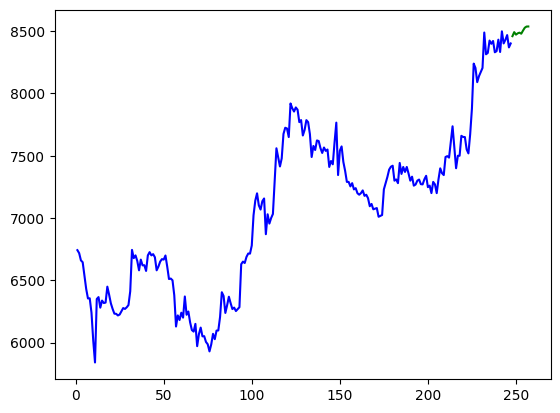

In [67]:
plt.plot(day_new, timeseries_data, color='blue')
plt.plot(day_pred, lst_output, color='green')